In [133]:
%matplotlib
import geopandas as gpd
import glob
from itertools import tee
import networkx as nx
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
import matplotlib
import json
import os
from collections import defaultdict
from shapely.geometry import Point, Polygon, LineString

#Roads = gpd.read_file("/Users/mac/Desktop/N-N_roads/N-N_Roads.shp")
Roads = gpd.read_file("/Users/mac/Desktop/N-N_roads/N-N_Roads_newline.shp")
Buildings = gpd.read_file("/Users/mac/Desktop/N-N_buildings/N-N_Buildings.shp")

def pairwise(line_coords):
    a,b = tee(line_coords, 2)
    next(b, None)
    return zip(a,b) #return (p1,p2), (p2,p3)...

def create_g(Geo_dataFrame):
    G = nx.DiGraph()
    for line in Geo_dataFrame.geometry:
       seq = pairwise(line.coords)
       for p1, p2 in seq:
           G.add_edge(p1, p2)
    return G

#Euclidean distance
def dist(n0, n1):
    x1, y1 = n0
    x2, y2 = n1
    distance = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return distance

def closest_node(sub_graph, start, end): 
    start_delta = float("inf")
    end_delta = float("inf")
    for n in sub_graph.nodes():
        s_dist = dist(start, n)
        e_dist = dist(end, n) 
        if s_dist < start_delta:
            nn_start = n
            start_delta = s_dist
        if e_dist < end_delta:
            nn_end = n
            end_delta = e_dist
    return (nn_start, nn_end)

def add_attr(sub_graph):
    for n0, n1 in sub_graph.edges_iter():
        distance = dist(n0, n1)
        sub_graph[n0][n1]["dist"] = distance

def shortest_dist(sub_graph, nn_start, nn_end):
    shortest_distance = nx.shortest_path_length(sub_graph, source= nn_start ,target= nn_end, weight= "dist")
    return shortest_distance
def shortest_path(sub_graph, nn_start, nn_end):
    shortest_path = nx.shortest_path(sub_graph, source= nn_start, target= nn_end, weight= "dist")
    return shortest_path
def calculate_distance(origin_coords, dest_coords, graph):
    nn_start, nn_end = closest_node(graph, origin_coords, dest_coords)
    shortest_distance = shortest_dist(graph, nn_start, nn_end)
    return shortest_distance

def calculate_path(origin_coords, dest_coords, graph):
    nn_start, nn_end = closest_node(graph, origin_coords, dest_coords)
    optimal_path = shortest_path(graph, nn_start, nn_end)
    return optimal_path

#convert road into graph
G = create_g(Roads)
sg = list(nx.connected_component_subgraphs(G.to_undirected()))[0] #only use the first graph
add_attr(sg) #add distance attribute

Using matplotlib backend: MacOSX


In [126]:
Roads

,CENTERLINE,FULLNAME,ROADCLASS,SHAPE_STLe,geometry
0,41620,Green Rd,Major Arterial,234.548738,LINESTRING (13305673.41009918 293875.819871154...
1,41634,Plymouth Rd,Major Arterial,1056.308636,LINESTRING (13304626.67191015 293725.707994420...
2,41647,Plymouth Rd,Major Arterial,445.398764,LINESTRING (13304211.02984976 293565.640080998...
3,41660,Plymouth Rd,Major Arterial,107.807706,LINESTRING (13304110.19553218 293527.496380190...
4,41664,Plymouth Rd,Major Arterial,34.930841,LINESTRING (13303903.97932481 293449.723414305...
5,41677,Plymouth Rd,Major Arterial,818.195872,LINESTRING (13303123.14992846 293219.209962793...
6,41681,Plymouth Rd,Major Arterial,603.830811,LINESTRING (13302519.91994156 293192.279844623...
7,41683,Plymouth Rd,Major Arterial,740.245110,LINESTRING (13301780.2975662 293161.9225610935...
8,41684,Plymouth Rd,Major Arterial,40.271454,LINESTRING (13301740.06003339 293160.270002035...
9,41699,Plymouth Rd,Major Arterial,1329.432460,LINESTRING (13300430.99999397 293000.749988787...


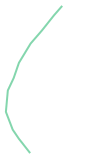

In [124]:
Roads.loc[160,'geometry']

In [127]:
len(sg)

1005

#########################plot

In [104]:
O = Buildings.geometry.iloc[1].coords[0]
D = Buildings.geometry.iloc[2].coords[0]

line = calculate_path(O, D, sg)

x = [item[0] for item in line]; y = [item[1] for item in line]

from matplotlib import pyplot as plt
plt.plot(x, y)

calculate_distance(O, D, sg)

2775.8956386594218

###########################

In [128]:
i = 0
OD_distance = []
while i < 61:
    O = Buildings.geometry.iloc[i].coords[0]
    j = 0
    temp_distance = []
    while j < 61:
        D = Buildings.geometry.iloc[j].coords[0]
        distance = calculate_distance(O, D, sg)
        temp_distance.append(distance)
        j = j+1
    OD_distance.append(temp_distance)
    i = i+1

In [80]:
m = 0
OD_eudistance = []
while m < 61:
    O = Buildings.geometry.iloc[m].coords[0]
    n = 0
    temp_eudistance = []
    while n < 61:
        D = Buildings.geometry.iloc[n].coords[0]
        eudistance = dist(O, D)
        temp_eudistance.append(eudistance)
        n = n + 1
    OD_eudistance.append(temp_eudistance)
    m = m + 1

In [81]:
network_eudistance = pd.DataFrame({'ID': Buildings['OBJECTID_1']})
i = 0
while i < 61:
    network_eudistance[Buildings['OBJECTID_1'][i]] = OD_eudistance[i]
    i = i+1

In [129]:
network_distance = pd.DataFrame({'ID': Buildings['OBJECTID_1']})
i = 0
while i < 61:
    network_distance[Buildings['OBJECTID_1'][i]] = OD_distance[i]
    i = i+1

In [83]:
network_eudistance

,ID,2,3,4,7,9,10,11,13,14,...,97,98,99,100,101,102,103,107,108,113
0,2,0.000000,1546.037121,618.811626,1592.818412,1449.499365,597.330991,1380.700366,838.860179,367.381376,...,3308.556688,3625.998607,3894.320720,3845.692590,3793.973577,3545.875878,4267.983622,4495.853033,4156.968009,1782.414563
1,3,1546.037121,0.000000,2077.675600,151.527110,781.899076,1901.950008,1952.905177,1705.948445,1647.412626,...,1808.840597,2111.208086,2376.536729,2380.222922,2302.876334,2055.671352,2818.458799,2971.439486,2666.170330,804.342420
2,4,618.811626,2077.675600,0.000000,2096.830429,1790.550816,270.879692,1200.755447,730.715322,438.168573,...,3761.110974,4087.125588,4355.544031,4264.676004,4232.559301,3987.350543,4669.862575,4959.610518,4590.831231,2135.723048
3,7,1592.818412,151.527110,2096.830429,0.000000,667.519815,1905.997488,1883.406568,1675.643933,1661.270063,...,1727.637408,2038.476934,2305.900523,2287.604390,2219.199891,1970.999957,2722.304887,2905.415927,2583.116624,656.956015
4,9,1449.499365,781.899076,1790.550816,667.519815,0.000000,1549.087276,1274.629320,1200.550628,1365.089926,...,2004.682517,2335.272479,2600.534826,2480.128598,2458.903510,2217.871014,2880.028441,3201.784227,2812.156238,345.254267
5,10,597.330991,1901.950008,270.879692,1905.997488,1549.087276,0.000000,951.586976,460.698540,275.095979,...,3537.153636,3865.217937,4132.955560,4028.673122,4002.559236,3758.941902,4428.399987,4736.640119,4358.534411,1892.999130
6,11,1380.700366,1952.905177,1200.755447,1883.406568,1274.629320,951.586976,0.000000,543.762275,1032.665231,...,3195.412964,3524.079099,3779.290113,3591.244618,3606.046063,3380.578444,3942.569556,4365.532962,3937.380889,1543.733806
7,13,838.860179,1705.948445,730.715322,1675.643933,1200.550628,460.698540,543.762275,0.000000,489.529899,...,3204.973945,3535.687082,3800.553464,3666.453870,3654.173491,3415.354081,4052.204051,4400.956630,4003.533991,1532.225055
8,14,367.381376,1647.412626,438.168573,1661.270063,1365.089926,275.095979,1032.665231,489.529899,0.000000,...,3324.093226,3649.659773,3918.155625,3831.825408,3797.113026,3551.446781,4240.202373,4522.217359,4156.150945,1710.086950
9,15,1647.558732,125.716916,2164.387356,91.691412,757.768510,1979.179705,1974.070668,1759.137877,1730.583820,...,1689.996258,1995.483716,2261.722690,2258.273777,2183.460206,1935.854789,2695.730687,2858.652505,2547.057517,728.589706


In [130]:
network_distance

,ID,2,3,4,7,9,10,11,13,14,...,97,98,99,100,101,102,103,107,108,113
0,2,0.000000,2524.141494,251.754144,2207.645221,1454.749614,251.754144,1972.833711,251.754144,251.754144,...,4302.622624,4346.919441,5272.454508,5259.966673,5272.454508,4376.450652,5846.170231,5636.172449,5272.454508,1454.749614
1,3,2524.141494,0.000000,2775.895639,542.082322,1069.391881,2775.895639,3732.722573,2775.895639,2775.895639,...,2637.059726,2681.356542,3606.891610,3594.403775,3606.891610,2710.887754,4180.607333,3970.609551,3606.891610,1069.391881
2,4,251.754144,2775.895639,0.000000,2459.399365,1706.503758,0.000000,1793.405025,0.000000,0.000000,...,4554.376768,4598.673585,5524.208653,5511.720817,5524.208653,4628.204796,6097.924375,5887.926594,5524.208653,1706.503758
3,7,2207.645221,542.082322,2459.399365,0.000000,752.895607,2459.399365,3416.226299,2459.399365,2459.399365,...,2094.977403,2139.274220,3064.809288,3052.321452,3064.809288,2168.805431,3638.525010,3428.527229,3064.809288,752.895607
4,9,1454.749614,1069.391881,1706.503758,752.895607,0.000000,1706.503758,2663.330692,1706.503758,1706.503758,...,2847.873010,2892.169827,3817.704895,3805.217059,3817.704895,2921.701038,4391.420618,4181.422836,3817.704895,0.000000
5,10,251.754144,2775.895639,0.000000,2459.399365,1706.503758,0.000000,1793.405025,0.000000,0.000000,...,4554.376768,4598.673585,5524.208653,5511.720817,5524.208653,4628.204796,6097.924375,5887.926594,5524.208653,1706.503758
6,11,1972.833711,3732.722573,1793.405025,3416.226299,2663.330692,1793.405025,0.000000,1793.405025,1793.405025,...,5511.203703,5555.500520,6481.035587,6468.547752,6481.035587,5585.031731,7054.751310,6844.753528,6481.035587,2663.330692
7,13,251.754144,2775.895639,0.000000,2459.399365,1706.503758,0.000000,1793.405025,0.000000,0.000000,...,4554.376768,4598.673585,5524.208653,5511.720817,5524.208653,4628.204796,6097.924375,5887.926594,5524.208653,1706.503758
8,14,251.754144,2775.895639,0.000000,2459.399365,1706.503758,0.000000,1793.405025,0.000000,0.000000,...,4554.376768,4598.673585,5524.208653,5511.720817,5524.208653,4628.204796,6097.924375,5887.926594,5524.208653,1706.503758
9,15,2245.599832,580.036934,2497.353976,37.954611,790.850218,2497.353976,3454.180911,2497.353976,2497.353976,...,2057.022792,2101.319609,3026.854676,3014.366841,3026.854676,2130.850820,3600.570399,3390.572617,3026.854676,790.850218


##################################################

In [131]:
df_dist = network_distance.set_index(['ID'])

In [85]:
df_eudist = network_eudistance.set_index(['ID'])

In [89]:
df_eudist

,2,3,4,7,9,10,11,13,14,15,...,97,98,99,100,101,102,103,107,108,113
ID,,,,,,,,,,,,,,,,,,,,,
2,0.000000,1546.037121,618.811626,1592.818412,1449.499365,597.330991,1380.700366,838.860179,367.381376,1647.558732,...,3308.556688,3625.998607,3894.320720,3845.692590,3793.973577,3545.875878,4267.983622,4495.853033,4156.968009,1782.414563
3,1546.037121,0.000000,2077.675600,151.527110,781.899076,1901.950008,1952.905177,1705.948445,1647.412626,125.716916,...,1808.840597,2111.208086,2376.536729,2380.222922,2302.876334,2055.671352,2818.458799,2971.439486,2666.170330,804.342420
4,618.811626,2077.675600,0.000000,2096.830429,1790.550816,270.879692,1200.755447,730.715322,438.168573,2164.387356,...,3761.110974,4087.125588,4355.544031,4264.676004,4232.559301,3987.350543,4669.862575,4959.610518,4590.831231,2135.723048
7,1592.818412,151.527110,2096.830429,0.000000,667.519815,1905.997488,1883.406568,1675.643933,1661.270063,91.691412,...,1727.637408,2038.476934,2305.900523,2287.604390,2219.199891,1970.999957,2722.304887,2905.415927,2583.116624,656.956015
9,1449.499365,781.899076,1790.550816,667.519815,0.000000,1549.087276,1274.629320,1200.550628,1365.089926,757.768510,...,2004.682517,2335.272479,2600.534826,2480.128598,2458.903510,2217.871014,2880.028441,3201.784227,2812.156238,345.254267
10,597.330991,1901.950008,270.879692,1905.997488,1549.087276,0.000000,951.586976,460.698540,275.095979,1979.179705,...,3537.153636,3865.217937,4132.955560,4028.673122,4002.559236,3758.941902,4428.399987,4736.640119,4358.534411,1892.999130
11,1380.700366,1952.905177,1200.755447,1883.406568,1274.629320,951.586976,0.000000,543.762275,1032.665231,1974.070668,...,3195.412964,3524.079099,3779.290113,3591.244618,3606.046063,3380.578444,3942.569556,4365.532962,3937.380889,1543.733806
13,838.860179,1705.948445,730.715322,1675.643933,1200.550628,460.698540,543.762275,0.000000,489.529899,1759.137877,...,3204.973945,3535.687082,3800.553464,3666.453870,3654.173491,3415.354081,4052.204051,4400.956630,4003.533991,1532.225055
14,367.381376,1647.412626,438.168573,1661.270063,1365.089926,275.095979,1032.665231,489.529899,0.000000,1730.583820,...,3324.093226,3649.659773,3918.155625,3831.825408,3797.113026,3551.446781,4240.202373,4522.217359,4156.150945,1710.086950


In [109]:
df_dist

,2,3,4,7,9,10,11,13,14,15,...,97,98,99,100,101,102,103,107,108,113
ID,,,,,,,,,,,,,,,,,,,,,
2,0.000000,2524.141494,251.754144,2207.645221,1454.749614,251.754144,1972.833711,251.754144,251.754144,2245.599832,...,6401.346237,6445.643053,5645.120391,7353.481988,5645.120391,6475.174265,6767.278430,6000.189083,5645.120391,1454.749614
3,2524.141494,0.000000,2775.895639,542.082322,1069.391881,2775.895639,3732.722573,2775.895639,2775.895639,580.036934,...,4735.783338,4780.080155,3979.557493,5687.919090,3979.557493,4809.611366,5101.715532,4334.626185,3979.557493,1069.391881
4,251.754144,2775.895639,0.000000,2459.399365,1706.503758,0.000000,1793.405024,0.000000,0.000000,2497.353976,...,6653.100381,6697.397198,5896.874535,7605.236133,5896.874535,6726.928409,7019.032574,6251.943228,5896.874535,1706.503758
7,2207.645221,542.082322,2459.399365,0.000000,752.895607,2459.399365,3416.226299,2459.399365,2459.399365,37.954611,...,4193.701016,4237.997833,3437.475170,5145.836768,3437.475170,4267.529044,4559.633210,3792.543863,3437.475170,752.895607
9,1454.749614,1069.391881,1706.503758,752.895607,0.000000,1706.503758,2663.330692,1706.503758,1706.503758,790.850218,...,4946.596623,4990.893440,4190.370777,5898.732375,4190.370777,5020.424651,5312.528817,4545.439470,4190.370777,0.000000
10,251.754144,2775.895639,0.000000,2459.399365,1706.503758,0.000000,1793.405024,0.000000,0.000000,2497.353976,...,6653.100381,6697.397198,5896.874535,7605.236133,5896.874535,6726.928409,7019.032574,6251.943228,5896.874535,1706.503758
11,1972.833711,3732.722573,1793.405024,3416.226299,2663.330692,1793.405024,0.000000,1793.405024,1793.405024,3454.180911,...,7609.927315,7654.224132,6853.701470,7762.895176,6853.701470,7683.755343,7324.657236,7208.770162,6853.701470,2663.330692
13,251.754144,2775.895639,0.000000,2459.399365,1706.503758,0.000000,1793.405024,0.000000,0.000000,2497.353976,...,6653.100381,6697.397198,5896.874535,7605.236133,5896.874535,6726.928409,7019.032574,6251.943228,5896.874535,1706.503758
14,251.754144,2775.895639,0.000000,2459.399365,1706.503758,0.000000,1793.405024,0.000000,0.000000,2497.353976,...,6653.100381,6697.397198,5896.874535,7605.236133,5896.874535,6726.928409,7019.032574,6251.943228,5896.874535,1706.503758


In [87]:
list_dist = []
#list_eudist = []
for i in df_dist.index:
    for j in df_dist.index[df_dist.index >= i ]:
        dist = df_dist.loc[i,j]
        #eudist = df_eudist.loc[i,j]
        list_dist.append(dist)
        #list_eudist.append(eudist)

####################

In [ ]:
#save df_eudist as csv
df_eudist.to_csv('/Users/mac/Desktop/eudist.csv')

In [132]:
df_dist.to_csv('/Users/mac/Desktop/dist_newline.csv')

###############################################

In [51]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [53]:
regr.fit(df_eudist, df_dist)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
# Plot outputs
plt.scatter(list_eudist, list_dist,  color='green')
plt.xlabel('Euclidean Distance, m')
plt.ylabel('Road Distance, m')
#plt.plot(list_eudist, regr.predict(list_eudist), color='blue',linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()